In [1]:
import numpy as np
import pandas as pd

In [2]:
np.__version__, pd.__version__

('2.0.2', '2.2.3')

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
data['v1'] = LabelEncoder().fit_transform(data['v1'])
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
import sklearn

sklearn.__version__

'1.6.1'

In [7]:
count = (x for x in data['v2'] if x is None)
count = sum(count)
count

0

In [8]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
data.drop_duplicates(inplace = True, keep = 'first')
data.shape

(5169, 2)

In [10]:
count = (x for x in data['v1'] if x == 1)
count = sum(count)
count

653

In [11]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.__version__

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sangam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'3.9.1'

In [12]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

data['char_count'] = data['v2'].apply(len)
data['word_count'] = data['v2'].apply(lambda x: len(word_tokenize(x)))
data['sent_count'] = data['v2'].apply(lambda x: len(sent_tokenize(x)))
data[['char_count', 'word_count', 'sent_count']].describe()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sangam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
# save processed data
data.to_csv('spam_processed.csv', index=False)



#Text Preprocessing

In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer as ps
import string

In [16]:
data = pd.read_csv('spam_processed.csv')

In [17]:


def text_preprocess(text):
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer as ps
    import string

    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[x for x in text if x.isalnum()]
    text = y[:]
    y.clear()
    y = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]

    text = y[:]
    y.clear()

    y = [ps().stem(word) for word in text]

    return " ".join(y)


In [18]:
data['preprocessed_text'] = data['v2'].apply(text_preprocess)
data

,v1,v2,char_count,word_count,sent_count,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5165,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5166,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5167,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [19]:
from wordcloud import WordCloud

wc = WordCloud(width=1280, height=720, min_font_size=10, background_color='white')

spam_texts = wc.generate(data[data['v1'] == 1]['preprocessed_text'].str.cat(sep=' '))

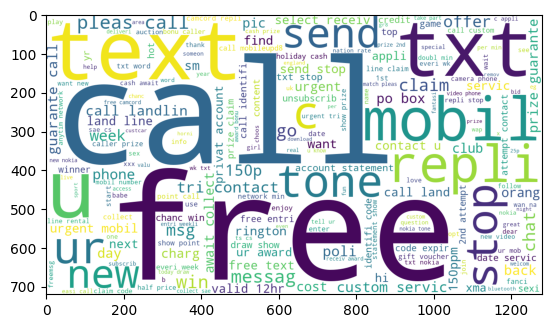

In [20]:
import matplotlib.pyplot as plt

plt.imshow(spam_texts)

In [21]:
data[['preprocessed_text', 'v1']].to_csv('spam_processed.csv', index=False)

Model Building

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['preprocessed_text']).toarray()
y = data['v1'].values

y.shape

(5169,)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [24]:
count_X = [x for x in y_train if x == 1]
count_X = sum(count_X)
count_X

527

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [26]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [27]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8607350096711799
[[783 125]
 [ 19 107]]
0.46120689655172414


In [28]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[908   0]
 [ 37  89]]
1.0


In [29]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9758220502901354
[[908   0]
 [ 25 101]]
1.0


BNB selected

In [30]:
from sklearn.svm import SVC

svc = SVC(kernel='sigmoid', gamma=1.0)

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))


0.971953578336557
[[907   1]
 [ 28  98]]
0.98989898989899


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
print(precision_score(y_test, y_pred_rfc))

0.9690522243713733
[[908   0]
 [ 32  94]]
1.0


In [32]:
import pickle

pickle.dump(rfc, open('spam.pkl', 'wb'))
pickle.dump(tfidf, open('spam_vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('spam_model.pkl', 'wb'))
pickle.dump(svc, open('spam_svc.pkl', 'wb'))
pickle.dump(text_preprocess, open('spam_preprocess.pkl', 'wb'))

In [33]:
bnb.predict(tfidf.transform([text_preprocess('Congralutationsss...you have been selected to a lottery. Click here to claim your prize')]))[0]

1